## Assignment 7 - Decision Trees ##

### 1 ###

The dataset contains information pertaining to patients with hepatitis.  It has 155 instances with 20 features.  Here is a list of the features extracted from the documentation:
>1. Class: DIE, LIVE 
>2. AGE: 10, 20, 30, 40, 50, 60, 70, 80 
>3. SEX: male, female 
>4. STEROID: no, yes 
>5. ANTIVIRALS: no, yes 
>6. FATIGUE: no, yes 
>7. MALAISE: no, yes 
>8. ANOREXIA: no, yes 
>9. LIVER BIG: no, yes 
>10. LIVER FIRM: no, yes 
>11. SPLEEN PALPABLE: no, yes 
>12. SPIDERS: no, yes 
>13. ASCITES: no, yes 
>14. VARICES: no, yes 
>15. BILIRUBIN*: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00 
>-- see the note below 
>16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250 
>17. SGOT: 13, 100, 200, 300, 400, 500, 
>18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0 
>19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90 
>20. HISTOLOGY: no, yes

There's little other information regarding the nature of the data, and it's an older dataset from 1988 donated from CMU, so finding out more would probably be difficult.  Most of these features refer to either symptoms or the results of tests regarding liver function.  For example, PROTIME probably refers to Prothrombin time, which is a test of how long it takes prothrombin to cause blood clotting and is a protein released by the liver.  The SPIDERS test refers to the spider angiomas symptom, although it may be more amusing to think of the possibilities.

### 2 ###
1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, and 20 are categorical features.  2, 16, 17, and 19 are discrete features.  The other features are essentially continuous for all practical purposes, although due to limitations in measurements could technically be considered discrete.  From the documentation:

> The BILIRUBIN attribute appears to be continuously-valued. I checked this with the donater, Bojan Cestnik, who replied: 

>About the hepatitis database and BILIRUBIN problem I would like to say the following: BILIRUBIN is continuous attribute (= the number of it's "values" in the ASDOHEPA.DAT file is negative!!!); "values" are quoted because when speaking about the continuous attribute there is no such thing as all possible values. However, they represent so called "boundary" values; according to these "boundary" values the attribute can be discretized. At the same time, because of the continious attribute, one can perform some other test since the continuous information is preserved. I hope that these lines have at least roughly answered your question.



In [1]:
#%pylab inline
%matplotlib inline 

import pandas as pd

In [2]:
names = pd.read_csv('names', header=None)
data = pd.read_csv('./hepatitis.data', names=names.values[0], header=None)

The documentation for the data provides the number of missing values (marked as '?'):

>Attribute&nbsp;Number:&nbsp;&nbsp;&nbsp;&nbsp;Number&nbsp;of&nbsp;Missing&nbsp;Values:<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1:&nbsp;&nbsp;&nbsp;&nbsp;0<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2:&nbsp;&nbsp;&nbsp;&nbsp;0<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3:&nbsp;&nbsp;&nbsp;&nbsp;0<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4:&nbsp;&nbsp;&nbsp;&nbsp;1<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;5:&nbsp;&nbsp;&nbsp;&nbsp;0<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;6:&nbsp;&nbsp;&nbsp;&nbsp;1<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;7:&nbsp;&nbsp;&nbsp;&nbsp;1<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;8:&nbsp;&nbsp;&nbsp;&nbsp;1<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;9:&nbsp;&nbsp;&nbsp;&nbsp;10<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;10:&nbsp;&nbsp;&nbsp;&nbsp;11<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;11:&nbsp;&nbsp;&nbsp;&nbsp;5<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;12:&nbsp;&nbsp;&nbsp;&nbsp;5<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;13:&nbsp;&nbsp;&nbsp;&nbsp;5<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;14:&nbsp;&nbsp;&nbsp;&nbsp;5<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;15:&nbsp;&nbsp;&nbsp;&nbsp;6<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;16:&nbsp;&nbsp;&nbsp;&nbsp;29<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;17:&nbsp;&nbsp;&nbsp;&nbsp;4<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;18:&nbsp;&nbsp;&nbsp;&nbsp;16<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;19:&nbsp;&nbsp;&nbsp;&nbsp;67<br>
>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;20:&nbsp;&nbsp;&nbsp;&nbsp;0

Total number of missing values:

In [3]:
data.stack().value_counts()['?']

167

We can confirm what the documentation states:

In [4]:
for column in data.columns:
    count = data[column].value_counts().to_frame().sort_index(ascending=True)
    if '?' in count.index:
        print("{0}: {1}".format(count.loc["?"].index[0], count.loc["?"][0]))

STEROID: 1
FATIGUE: 1
MALAISE: 1
ANOREXIA: 1
LIVER_BIG: 10
LIVER_FIRM: 11
SPLEEN_PALPABLE: 5
SPIDERS: 5
ASCITES: 5
VARICES: 5
BILIRUBIN: 6
ALKPHOSPHATE: 29
SGOT: 4
ALBUMIN: 16
PROTIME: 67


We will substitute '?', aka missing values, with -1 to make the values easier chart and also because DecisionTreeClassifier doesn't support missing values.

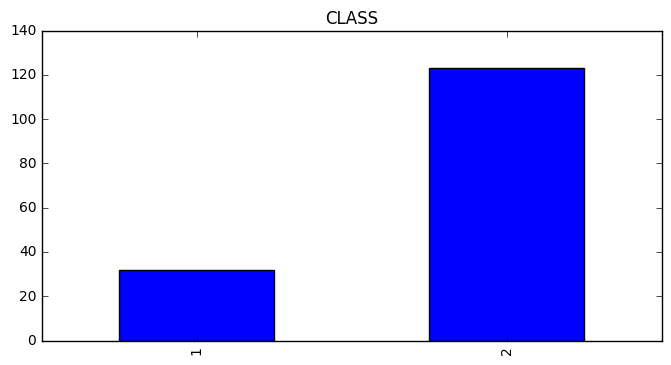

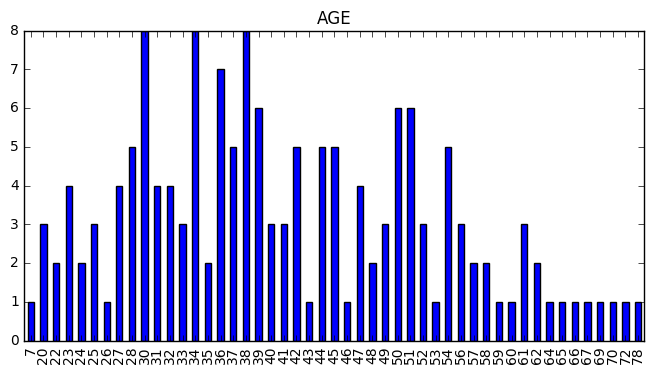

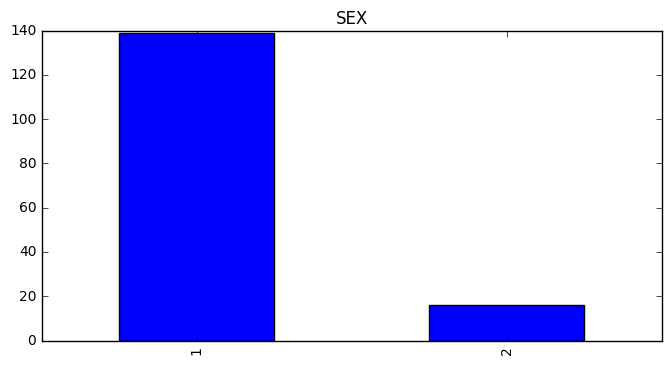

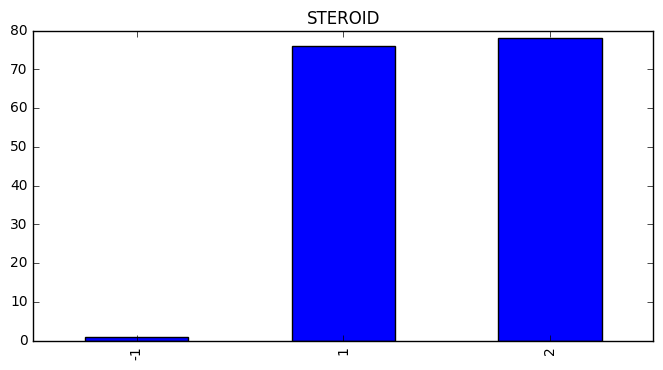

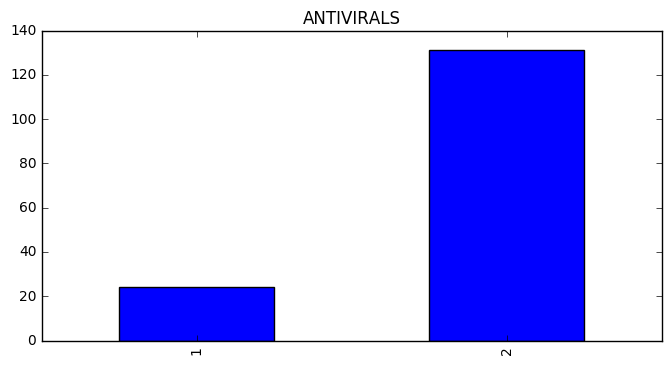

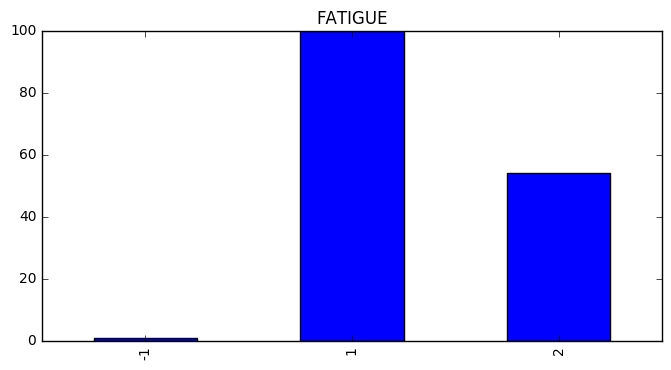

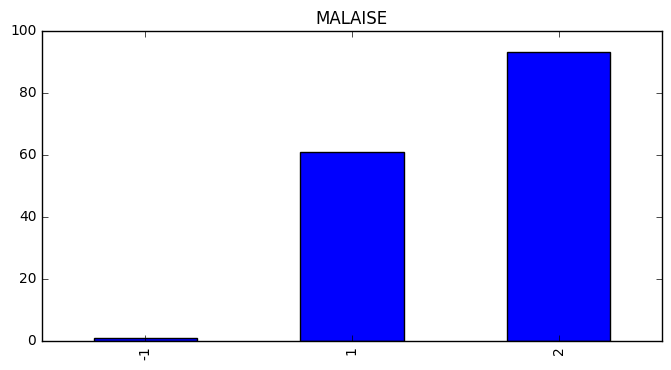

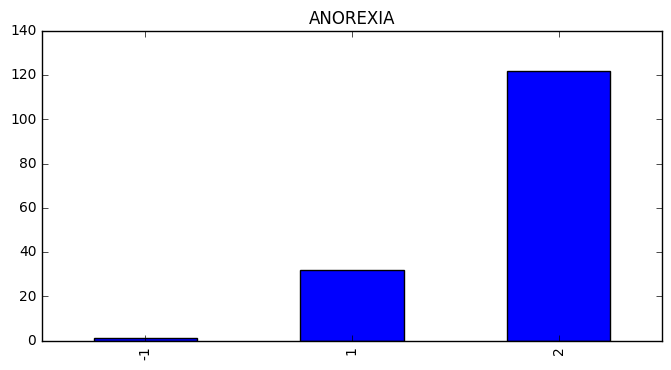

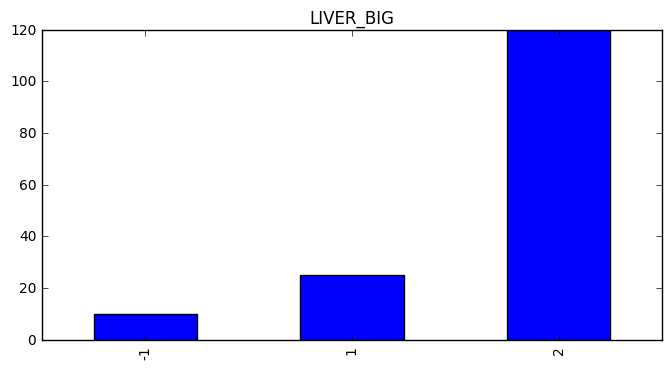

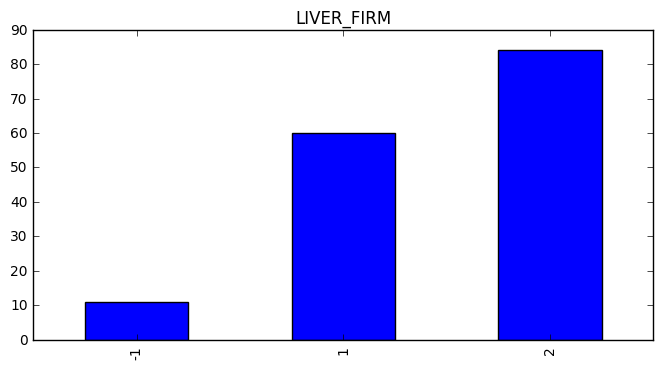

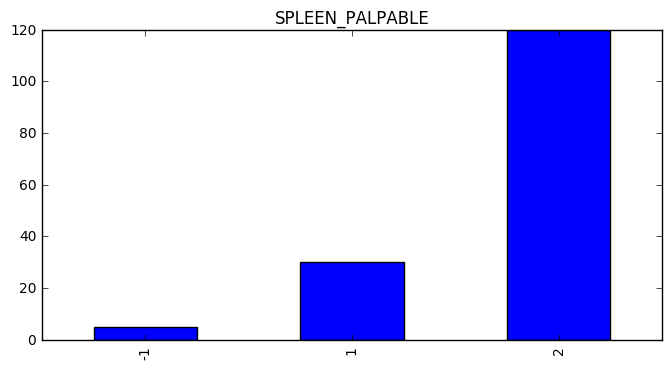

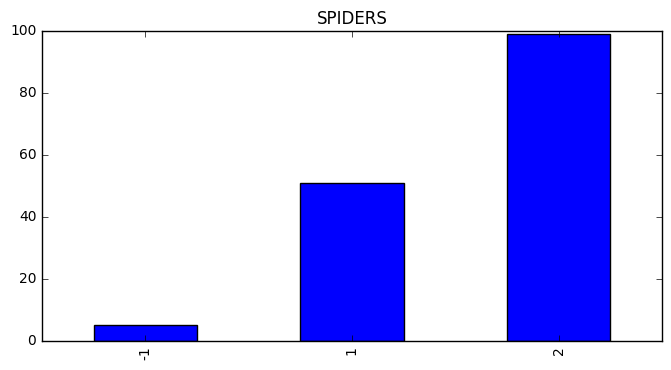

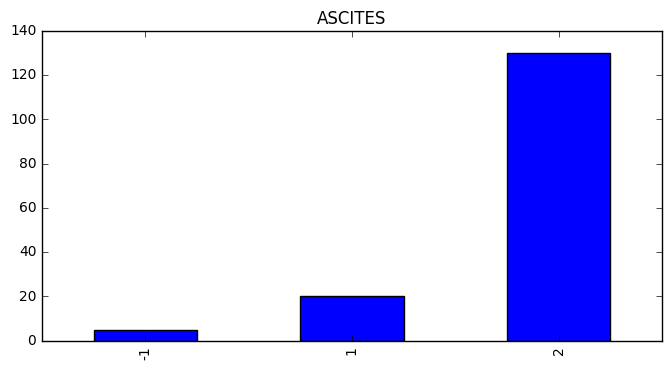

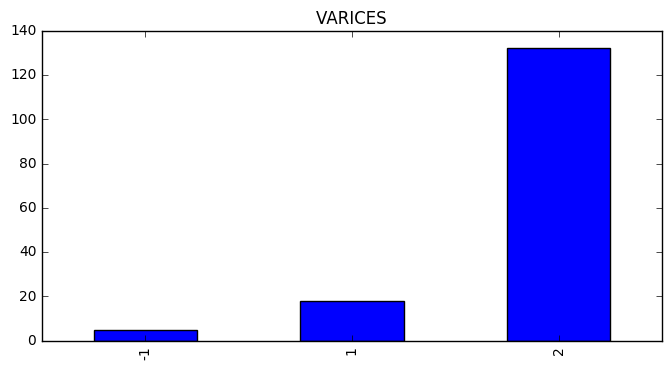

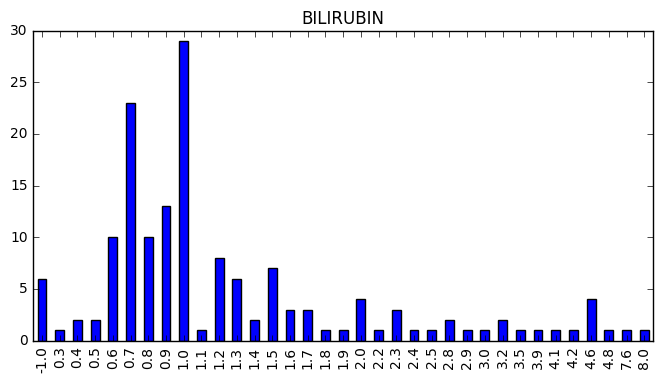

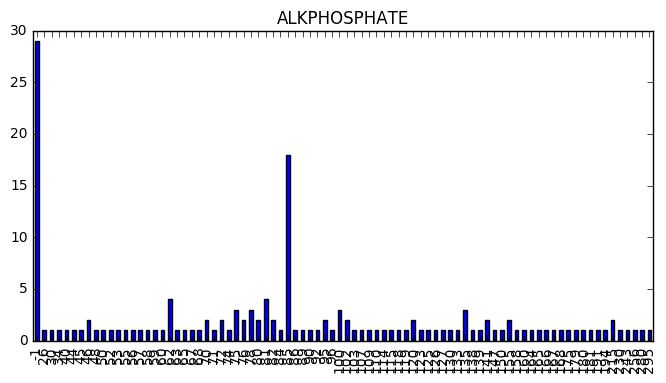

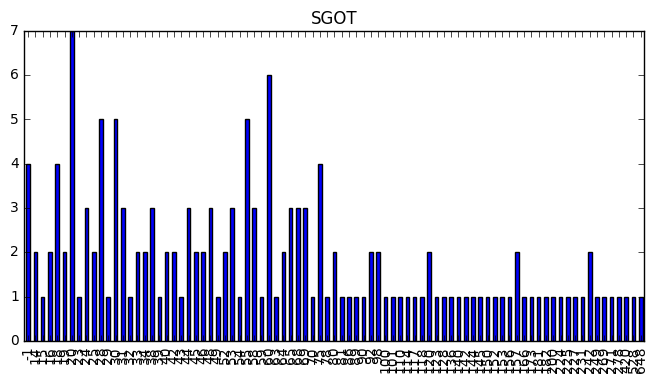

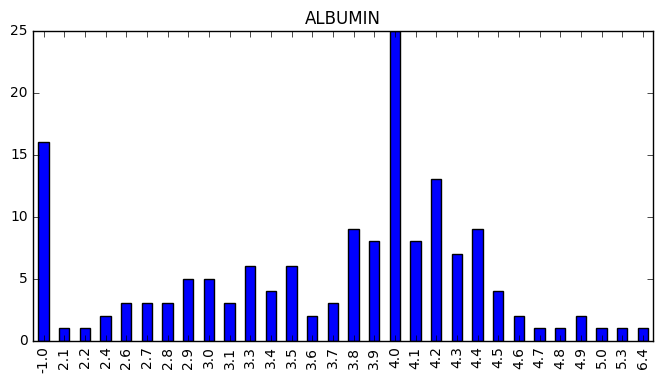

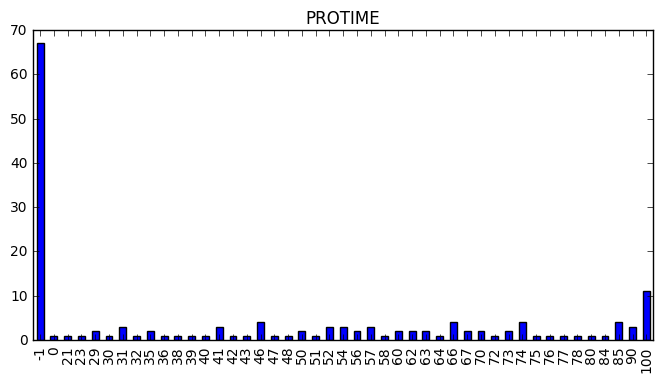

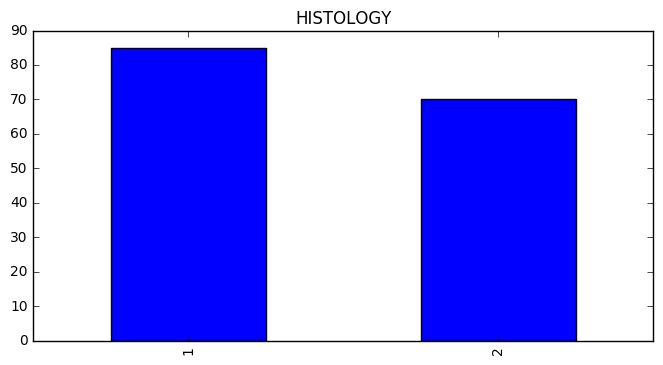

In [5]:
import matplotlib.pyplot as plt

data_no_q = data.replace('?', -1)

for column in data_no_q.columns:
    fig = plt.figure()
    pd.value_counts(pd.to_numeric(data_no_q[column])).sort_index(ascending=True).plot(kind='bar', figsize=(8, 4), title=column)
    fig.canvas.draw()

### 3 ###

In [6]:
from sklearn import tree, model_selection

rseed=100
data_train, data_test = model_selection.train_test_split(data_no_q, random_state=rseed, test_size=0.1)

train_labels = data_train['CLASS'].values
train_values = data_train[data_no_q.columns.drop(['CLASS'])]
test_labels = data_test['CLASS'].values
test_values = data_test[data_no_q.columns.drop(['CLASS'])]

clf = tree.DecisionTreeClassifier(random_state=rseed)
clf.fit(train_values, train_labels)
clf.score(test_values, test_labels)

0.75

### 4 ###

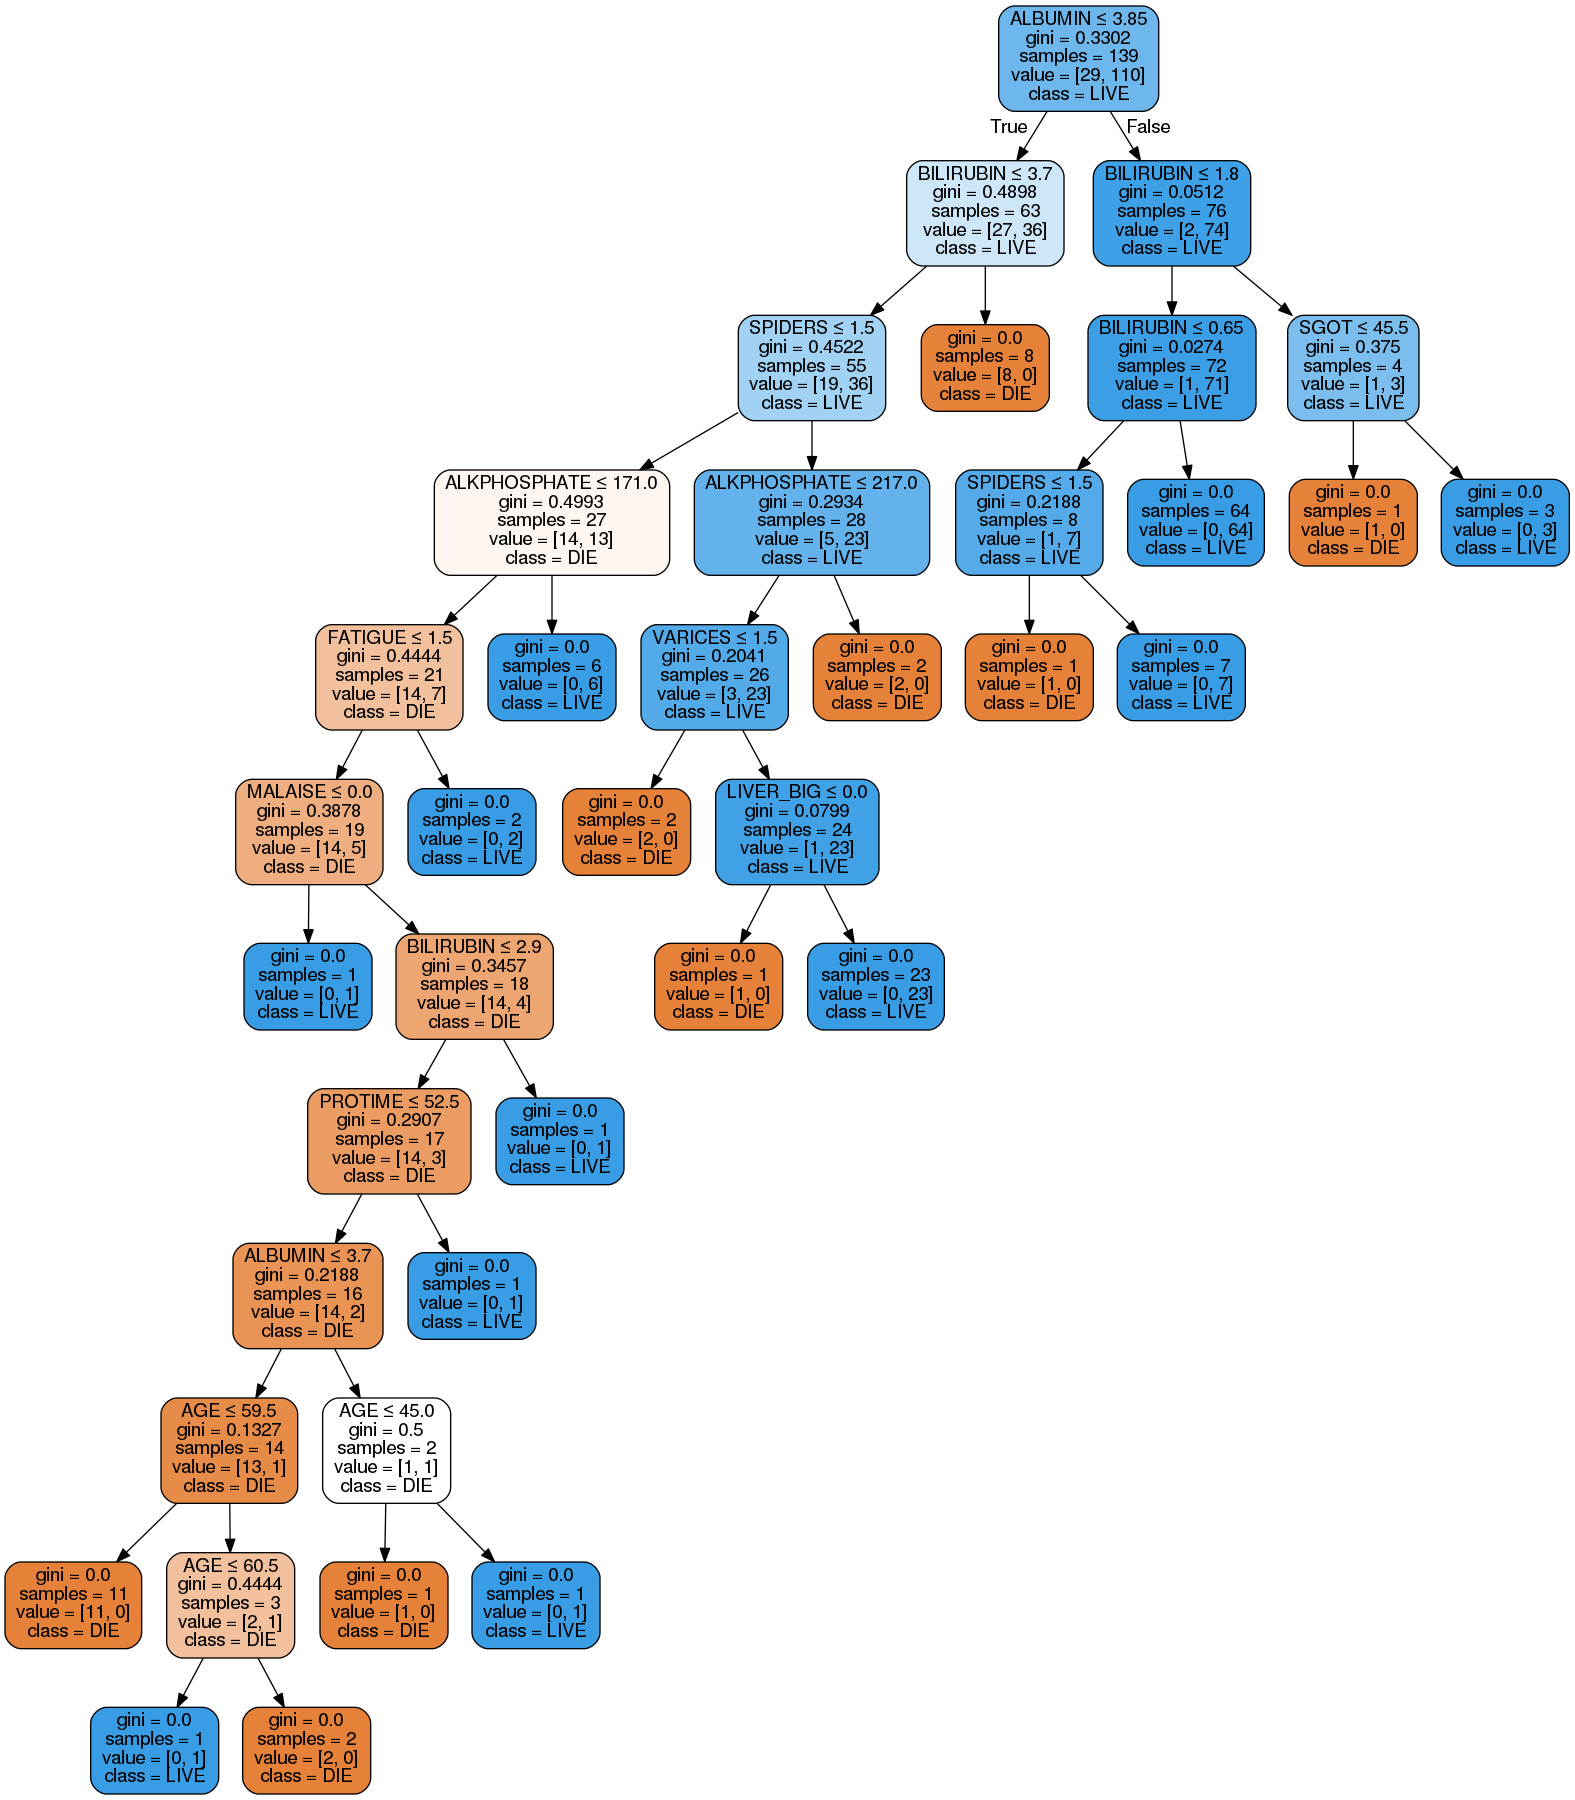

In [7]:
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=names.as_matrix()[0][1:],
                         class_names=['DIE', 'LIVE'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

### 5 ###

Our new patient instance is in pretty bad shape, so he might die, but we're not sure:

In [20]:
import warnings

#70 years old
#male
#(-) steroid
#(-) antivirals
#(+) fatigue
#(-) malaise
#(-) anorexia
#(+) liver_big
#(+) liver_firm
#(-) spleen_palpable
#(+) spiders
#(+) ascites
#(-) varies
#bilurubin 3.7
#alkaline phosphate 225
#sgot 18
#albumin 1.7
#missing protime
#(+) histology 

sample = pd.Series((70, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 3.7, 225, 18, 1.7, -1, 2))
#1 = DIE, 2 = LIVE
print(clf.predict([sample]))

print(clf.predict_proba([sample]))

[1]
[[ 1.  0.]]


First, we go left since the patient's albumin level is 1.7 <= 3.85.  Next, we go left since the patient's bilurubin level is 3.7 <= 3.7.  Next, we go right since the patient has spider angiomas, in classification terms 2 > 1.5.  Finally, we go right on alkaline phosphatase since 225 >= 217.0 and see that our patient is classified as 'DIE'.  The final result makes sense.  Having three indicators for poor liver function (low albumin, spider angiomas, and high alkaline phosphatase) will lead to a poor prognosis, although being negative for the bilurubin test complicates things a little.  Still, the final outcome is expected.

We can get a slightly better result by limiting the maximum depth.  Some other parameters were tried but didn't produce a huge difference, although some make sense to turn on for this small of a dataset such as presort.  It's also easier to understand, which is important for a decision tree.

In [9]:
clf2 = tree.DecisionTreeClassifier(max_features='auto', max_depth=6, random_state=rseed, presort=True)
clf2.fit(train_values, train_labels)
clf2.score(test_values, test_labels)

0.875

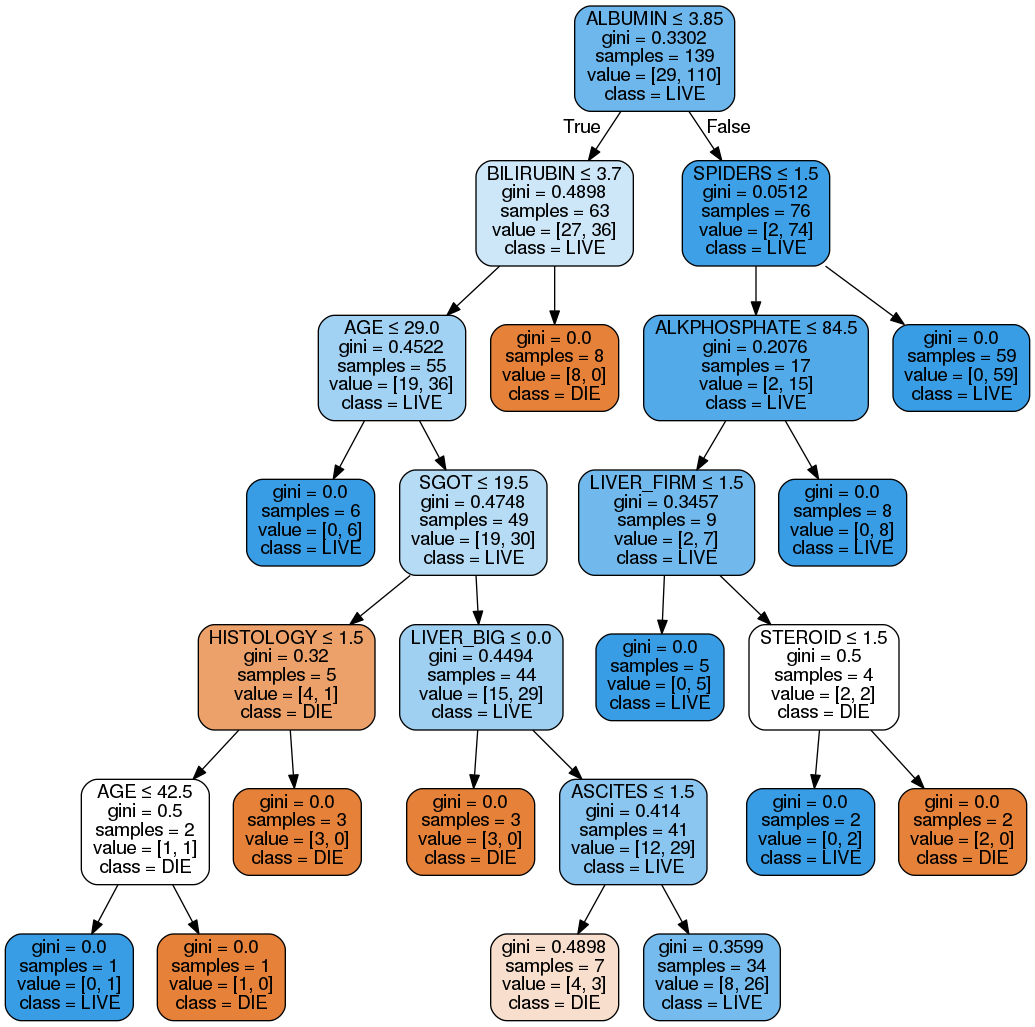

In [17]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         feature_names=names.as_matrix()[0][1:],
                         class_names=['DIE', 'LIVE'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())  

In [21]:
print(clf2.predict([sample]))
print(clf.predict_proba([sample]))

[1]
[[ 1.  0.]]
